--- 0. 라이브러리 임포트 및 설정 완료 ---

--- 1. 데이터 파일 확인 ---
총 169개 CSV 파일 발견.
설정된 샘플링 비율: 30.0%

--- 3. 데이터 준비 ---

훈련 데이터 로드 및 처리 중 (비율 0.3)...


100%|██████████| 135/135 [04:29<00:00,  1.99s/it]


Scaler 학습(fit) 중...

테스트 데이터 로드 및 처리 중 (비율 0.3)...


100%|██████████| 34/34 [01:13<00:00,  2.15s/it]



--- 4. 레이블 인코딩 (문자열 -> 숫자) ---
2-Class 매핑: {'Attack': np.int64(0), 'Benign': np.int64(1)}
8-Class 매핑 (일부): ['Benign' 'BruteForce' 'DDoS' 'DoS' 'Mirai']...

========== XGBoost 실행 ==========

[XGBoost (2-Class)] 훈련 시작...
[XGBoost (2-Class)] 예측 중...
##### XGBoost (2-Class) 결과 #####
정확도: 0.9945
              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00   3029071
      Benign       0.89      0.88      0.88     72995

    accuracy                           0.99   3102066
   macro avg       0.94      0.94      0.94   3102066
weighted avg       0.99      0.99      0.99   3102066



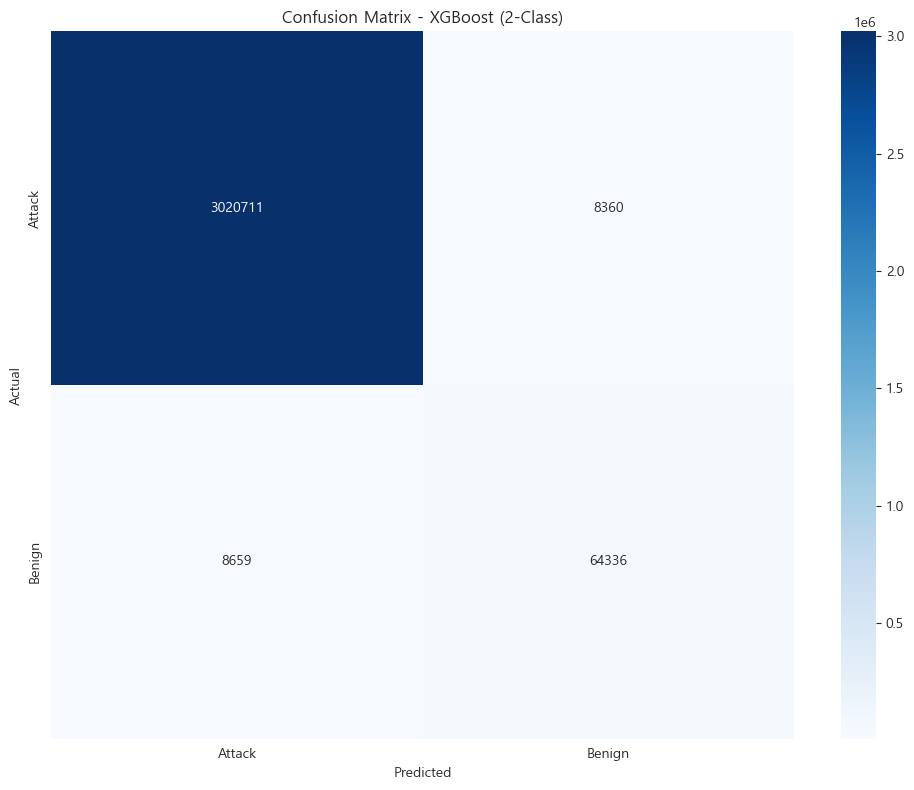


[XGBoost (8-Class)] 훈련 시작...
[XGBoost (8-Class)] 예측 중...
##### XGBoost (8-Class) 결과 #####
정확도: 0.9953
              precision    recall  f1-score   support

      Benign       0.91      0.97      0.94     72995
  BruteForce       0.82      0.28      0.41       895
        DDoS       1.00      1.00      1.00   2257857
         DoS       1.00      1.00      1.00    537659
       Mirai       1.00      1.00      1.00    175104
       Recon       0.88      0.79      0.83     23591
    Spoofing       0.87      0.84      0.85     32341
         Web       0.71      0.18      0.29      1624

    accuracy                           1.00   3102066
   macro avg       0.90      0.76      0.79   3102066
weighted avg       1.00      1.00      1.00   3102066



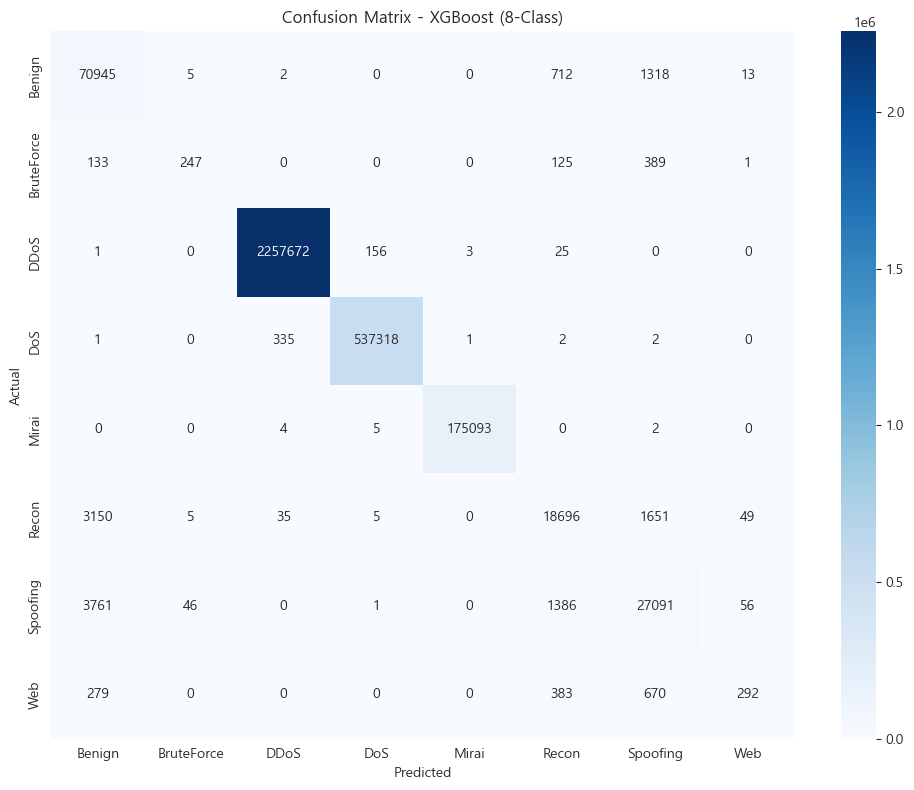


[XGBoost] 34-Class 훈련은 데이터가 커서 오래 걸릴 수 있습니다.

[XGBoost (34-Class)] 훈련 시작...
[XGBoost (34-Class)] 예측 중...
##### XGBoost (34-Class) 결과 #####
정확도: 0.9936
                         precision    recall  f1-score   support

       Backdoor_Malware       0.50      0.05      0.09       218
          BenignTraffic       0.89      0.98      0.93     72995
       BrowserHijacking       0.85      0.23      0.36       376
       CommandInjection       0.74      0.25      0.38       343
 DDoS-ACK_Fragmentation       1.00      1.00      1.00     18818
        DDoS-HTTP_Flood       0.99      0.98      0.99      1935
        DDoS-ICMP_Flood       1.00      1.00      1.00    478436
DDoS-ICMP_Fragmentation       1.00      1.00      1.00     30217
      DDoS-PSHACK_Flood       1.00      1.00      1.00    272375
       DDoS-RSTFINFlood       1.00      1.00      1.00    268838
         DDoS-SYN_Flood       1.00      1.00      1.00    270248
         DDoS-SlowLoris       0.98      0.99      0.98      1582
DD

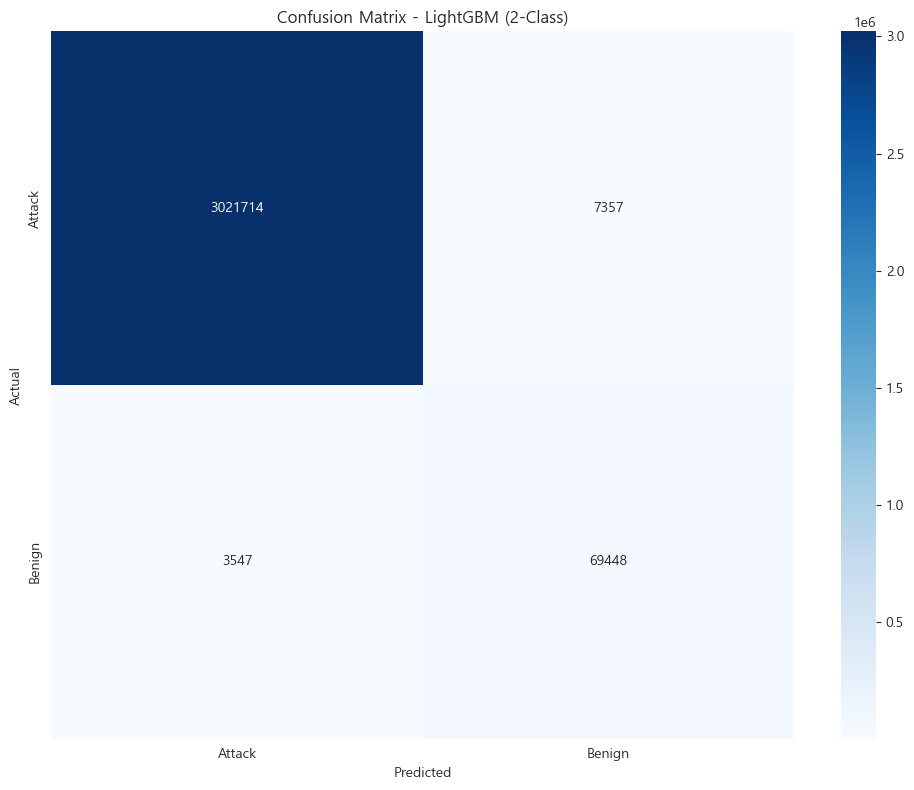


[LightGBM (8-Class)] 훈련 시작...
[LightGBM (8-Class)] 예측 중...
##### LightGBM (8-Class) 결과 #####
정확도: 0.9897
              precision    recall  f1-score   support

      Benign       0.87      0.95      0.91     72995
  BruteForce       0.13      0.26      0.17       895
        DDoS       1.00      1.00      1.00   2257857
         DoS       1.00      0.99      0.99    537659
       Mirai       1.00      1.00      1.00    175104
       Recon       0.79      0.71      0.75     23591
    Spoofing       0.83      0.76      0.79     32341
         Web       0.17      0.14      0.15      1624

    accuracy                           0.99   3102066
   macro avg       0.72      0.72      0.72   3102066
weighted avg       0.99      0.99      0.99   3102066



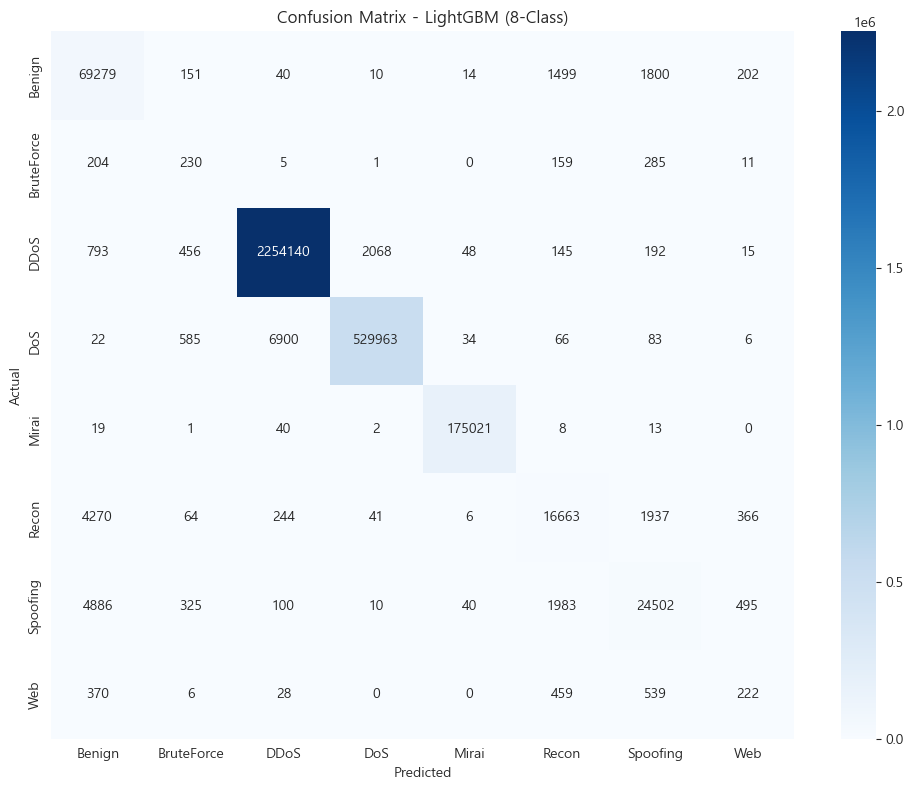


[LightGBM (34-Class)] 훈련 시작...
[LightGBM (34-Class)] 예측 중...
##### LightGBM (34-Class) 결과 #####
정확도: 0.6038
                         precision    recall  f1-score   support

       Backdoor_Malware       0.00      0.00      0.00       218
          BenignTraffic       0.74      0.52      0.61     72995
       BrowserHijacking       0.00      0.00      0.00       376
       CommandInjection       0.00      0.00      0.00       343
 DDoS-ACK_Fragmentation       0.00      0.00      0.00     18818
        DDoS-HTTP_Flood       0.00      0.00      0.00      1935
        DDoS-ICMP_Flood       0.98      0.92      0.95    478436
DDoS-ICMP_Fragmentation       0.65      0.37      0.47     30217
      DDoS-PSHACK_Flood       0.71      0.70      0.70    272375
       DDoS-RSTFINFlood       0.97      0.98      0.97    268838
         DDoS-SYN_Flood       0.45      0.79      0.58    270248
         DDoS-SlowLoris       0.00      0.00      0.00      1582
DDoS-SynonymousIP_Flood       0.00      0.00 

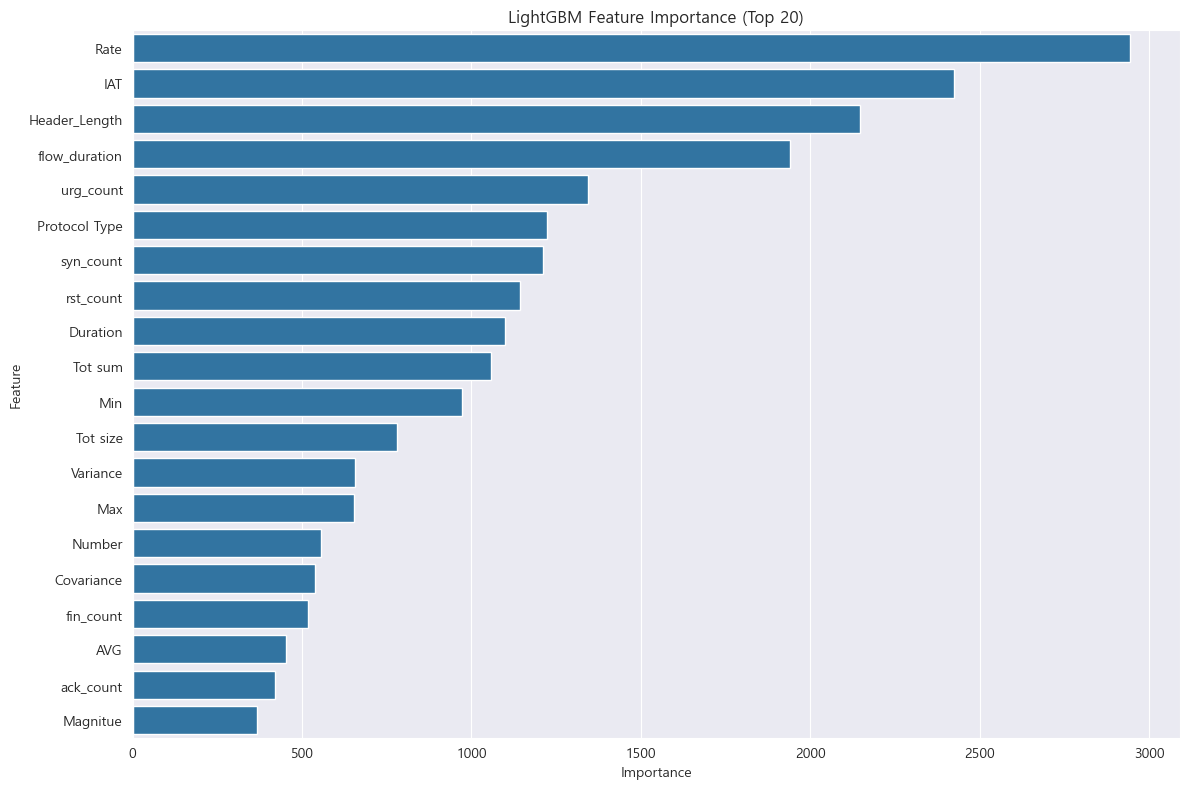


모든 작업이 완료되었습니다.


In [1]:
import pandas as pd
import numpy as np
import os
import warnings
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분할 및 전처리 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 모델 평가 라이브러리
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

# 부스팅 모델 라이브러리 (설치 필요: pip install xgboost lightgbm)
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 시각화 폰트 설정 (Windows: Malgun Gothic, Mac: AppleGothic 등 환경에 맞게 조정)
try:
    plt.rcParams['font.family'] = 'Malgun Gothic'
except:
    pass
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')

print("--- 0. 라이브러리 임포트 및 설정 완료 ---")


# --- 1. 데이터 로드 및 설정 ---
DATASET_DIRECTORY = 'CICIoT2023/'  # 데이터 경로 (환경에 맞게 수정)
SAMPLING_RATIO = 0.3  # 30% 샘플링 (속도를 위해 조절 가능)

try:
    all_files = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
    all_files.sort()
    print(f"\n--- 1. 데이터 파일 확인 ---")
    print(f"총 {len(all_files)}개 CSV 파일 발견.")
    print(f"설정된 샘플링 비율: {SAMPLING_RATIO * 100}%")
except FileNotFoundError:
    print(f"오류: '{DATASET_DIRECTORY}' 경로를 찾을 수 없습니다.")
    exit()


# --- 2. 컬럼 정의 및 전처리 함수 ---
X_columns = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration',
    'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
    'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
    'ece_flag_number', 'cwr_flag_number', 'ack_count',
    'syn_count', 'fin_count', 'urg_count', 'rst_count',
    'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP',
    'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
    'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue',
    'Radius', 'Covariance', 'Variance', 'Weight',
]
y_column = 'label'

# 레이블 매핑
dict_8_classes = {
    'DDoS-RSTFINFlood': 'DDoS', 'DDoS-PSHACK_Flood': 'DDoS', 'DDoS-SYN_Flood': 'DDoS',
    'DDoS-UDP_Flood': 'DDoS', 'DDoS-TCP_Flood': 'DDoS', 'DDoS-ICMP_Flood': 'DDoS',
    'DDoS-SynonymousIP_Flood': 'DDoS', 'DDoS-ACK_Fragmentation': 'DDoS',
    'DDoS-UDP_Fragmentation': 'DDoS', 'DDoS-ICMP_Fragmentation': 'DDoS',
    'DDoS-SlowLoris': 'DDoS', 'DDoS-HTTP_Flood': 'DDoS', 'DoS-UDP_Flood': 'DoS',
    'DoS-SYN_Flood': 'DoS', 'DoS-TCP_Flood': 'DoS', 'DoS-HTTP_Flood': 'DoS',
    'Mirai-greeth_flood': 'Mirai', 'Mirai-greip_flood': 'Mirai', 'Mirai-udpplain': 'Mirai',
    'Recon-PingSweep': 'Recon', 'Recon-OSScan': 'Recon', 'Recon-PortScan': 'Recon',
    'VulnerabilityScan': 'Recon', 'Recon-HostDiscovery': 'Recon',
    'DNS_Spoofing': 'Spoofing', 'MITM-ArpSpoofing': 'Spoofing',
    'BenignTraffic': 'Benign', 'BrowserHijacking': 'Web', 'Backdoor_Malware': 'Web',
    'XSS': 'Web', 'Uploading_Attack': 'Web', 'SqlInjection': 'Web',
    'CommandInjection': 'Web', 'DictionaryBruteForce': 'BruteForce'
}
dict_2_classes = {'BenignTraffic': 'Benign'}


# 전역 스케일러 (훈련 데이터로 fit 후 사용)
scaler = StandardScaler()

def load_and_preprocess(files, description, sample_ratio, is_train=False):
    """파일 로드 -> 샘플링 -> 전처리 -> 스케일링"""
    sampled_dfs = []
    print(f"\n{description} 데이터 로드 및 처리 중 (비율 {sample_ratio})...")

    for f in tqdm(files):
        file_path = os.path.join(DATASET_DIRECTORY, f)
        try:
            df = pd.read_csv(file_path, low_memory=False)
            # 결측치/무한대 처리
            df.replace([np.inf, -np.inf], np.nan, inplace=True)
            df.fillna(0, inplace=True)

            # 샘플링
            try:
                _, df_sample = train_test_split(
                    df, test_size=sample_ratio, stratify=df[y_column], random_state=42
                )
            except ValueError:
                df_sample = df.sample(frac=sample_ratio, random_state=42)

            sampled_dfs.append(df_sample)
        except Exception as e:
            print(f"파일 {f} 오류: {e}")

    full_df = pd.concat(sampled_dfs, ignore_index=True)
    X = full_df[X_columns]
    y = full_df[y_column]

    # 스케일링 (훈련 데이터일 때만 fit)
    if is_train:
        print("Scaler 학습(fit) 중...")
        scaler.fit(X)

    X_scaled = scaler.transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X_columns)

    return X_scaled_df, y


# --- 3. 데이터 분할 및 로드 ---
split_index = int(len(all_files) * 0.8)
training_files = all_files[:split_index]
test_files = all_files[split_index:]

print(f"\n--- 3. 데이터 준비 ---")
# 훈련 데이터 로드 (여기서 Scaler fit 수행)
X_train, y_train_raw = load_and_preprocess(training_files, "훈련", SAMPLING_RATIO, is_train=True)
# 테스트 데이터 로드 (이미 학습된 Scaler로 transform)
X_test, y_test_raw = load_and_preprocess(test_files, "테스트", SAMPLING_RATIO, is_train=False)

# 타겟 데이터 변환 (34종, 8종, 2종)
y_train_34 = y_train_raw
y_test_34 = y_test_raw

y_train_8 = y_train_raw.map(dict_8_classes).fillna('Benign')
y_test_8 = y_test_raw.map(dict_8_classes).fillna('Benign')

y_train_2 = y_train_raw.map(dict_2_classes).fillna('Attack')
y_test_2 = y_test_raw.map(dict_2_classes).fillna('Attack')


# --- 4. 레이블 인코딩 (부스팅 모델용) ---
print("\n--- 4. 레이블 인코딩 (문자열 -> 숫자) ---")
# XGBoost, LightGBM은 문자열 타겟을 직접 처리 못하므로 변환 필수
le_2 = LabelEncoder()
y_train_2_enc = le_2.fit_transform(y_train_2)
y_test_2_enc = le_2.transform(y_test_2)
print(f"2-Class 매핑: {dict(zip(le_2.classes_, le_2.transform(le_2.classes_)))}")

le_8 = LabelEncoder()
y_train_8_enc = le_8.fit_transform(y_train_8)
y_test_8_enc = le_8.transform(y_test_8)
print(f"8-Class 매핑 (일부): {le_8.classes_[:5]}...")

le_34 = LabelEncoder()
y_train_34_enc = le_34.fit_transform(y_train_34)
y_test_34_enc = le_34.transform(y_test_34)


# --- 5. 모델 학습 및 평가 함수 정의 ---
def train_and_evaluate(model, X_train, y_train, X_test, y_test, le, model_name, mode='macro'):
    print(f"\n[{model_name}] 훈련 시작...")
    model.fit(X_train, y_train)
    print(f"[{model_name}] 예측 중...")
    y_pred_enc = model.predict(X_test)

    # 숫자로 예측된 결과를 다시 문자열로 변환 (평가 리포트용)
    y_pred = le.inverse_transform(y_pred_enc)
    y_true = le.inverse_transform(y_test)

    # 평가
    acc = accuracy_score(y_true, y_pred)
    print(f"##### {model_name} 결과 #####")
    print(f"정확도: {acc:.4f}")
    print(classification_report(y_true, y_pred, zero_division=0))

    # Confusion Matrix 시각화 (클래스가 20개 미만일 때만)
    if len(le.classes_) < 20:
        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_true, y_pred, labels=le.classes_)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
        plt.title(f"Confusion Matrix - {model_name}")
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.tight_layout()
        plt.show()


# --- 6. XGBoost 실행 ---
print("\n========== XGBoost 실행 ==========")
# 2-Class
xgb_2 = XGBClassifier(n_estimators=100, n_jobs=-1, random_state=42, eval_metric='logloss')
train_and_evaluate(xgb_2, X_train, y_train_2_enc, X_test, y_test_2_enc, le_2, "XGBoost (2-Class)")

# 8-Class
xgb_8 = XGBClassifier(n_estimators=100, n_jobs=-1, random_state=42, eval_metric='mlogloss')
train_and_evaluate(xgb_8, X_train, y_train_8_enc, X_test, y_test_8_enc, le_8, "XGBoost (8-Class)")

# 34-Class
print("\n[XGBoost] 34-Class 훈련은 데이터가 커서 오래 걸릴 수 있습니다.")
xgb_34 = XGBClassifier(n_estimators=100, n_jobs=-1, random_state=42, eval_metric='mlogloss')
train_and_evaluate(xgb_34, X_train, y_train_34_enc, X_test, y_test_34_enc, le_34, "XGBoost (34-Class)")


# --- 7. LightGBM 실행 ---
print("\n========== LightGBM 실행 ==========")
# 2-Class
lgbm_2 = LGBMClassifier(n_estimators=100, n_jobs=-1, random_state=42, verbose=-1)
train_and_evaluate(lgbm_2, X_train, y_train_2_enc, X_test, y_test_2_enc, le_2, "LightGBM (2-Class)")

# 8-Class
lgbm_8 = LGBMClassifier(n_estimators=100, n_jobs=-1, random_state=42, verbose=-1)
train_and_evaluate(lgbm_8, X_train, y_train_8_enc, X_test, y_test_8_enc, le_8, "LightGBM (8-Class)")

# 34-Class
lgbm_34 = LGBMClassifier(n_estimators=100, n_jobs=-1, random_state=42, verbose=-1)
train_and_evaluate(lgbm_34, X_train, y_train_34_enc, X_test, y_test_34_enc, le_34, "LightGBM (34-Class)")


# --- 8. (보너스) 특성 중요도 시각화 (LightGBM 8-Class 기준) ---
print("\n--- 특성 중요도 분석 (LightGBM 8-Class) ---")
plt.figure(figsize=(12, 8))
# LightGBM 내장 plot_importance 대신 데이터프레임으로 직접 시각화
importances = pd.DataFrame({
    'Feature': X_columns,
    'Importance': lgbm_8.feature_importances_
}).sort_values(by='Importance', ascending=False).head(20)

sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('LightGBM Feature Importance (Top 20)')
plt.tight_layout()
plt.show()

print("\n모든 작업이 완료되었습니다.")


========== XGBoost (34-Class) ==========
훈련 시작 (시간이 소요될 수 있습니다)...
예측 수행 중...
정확도: 0.9936


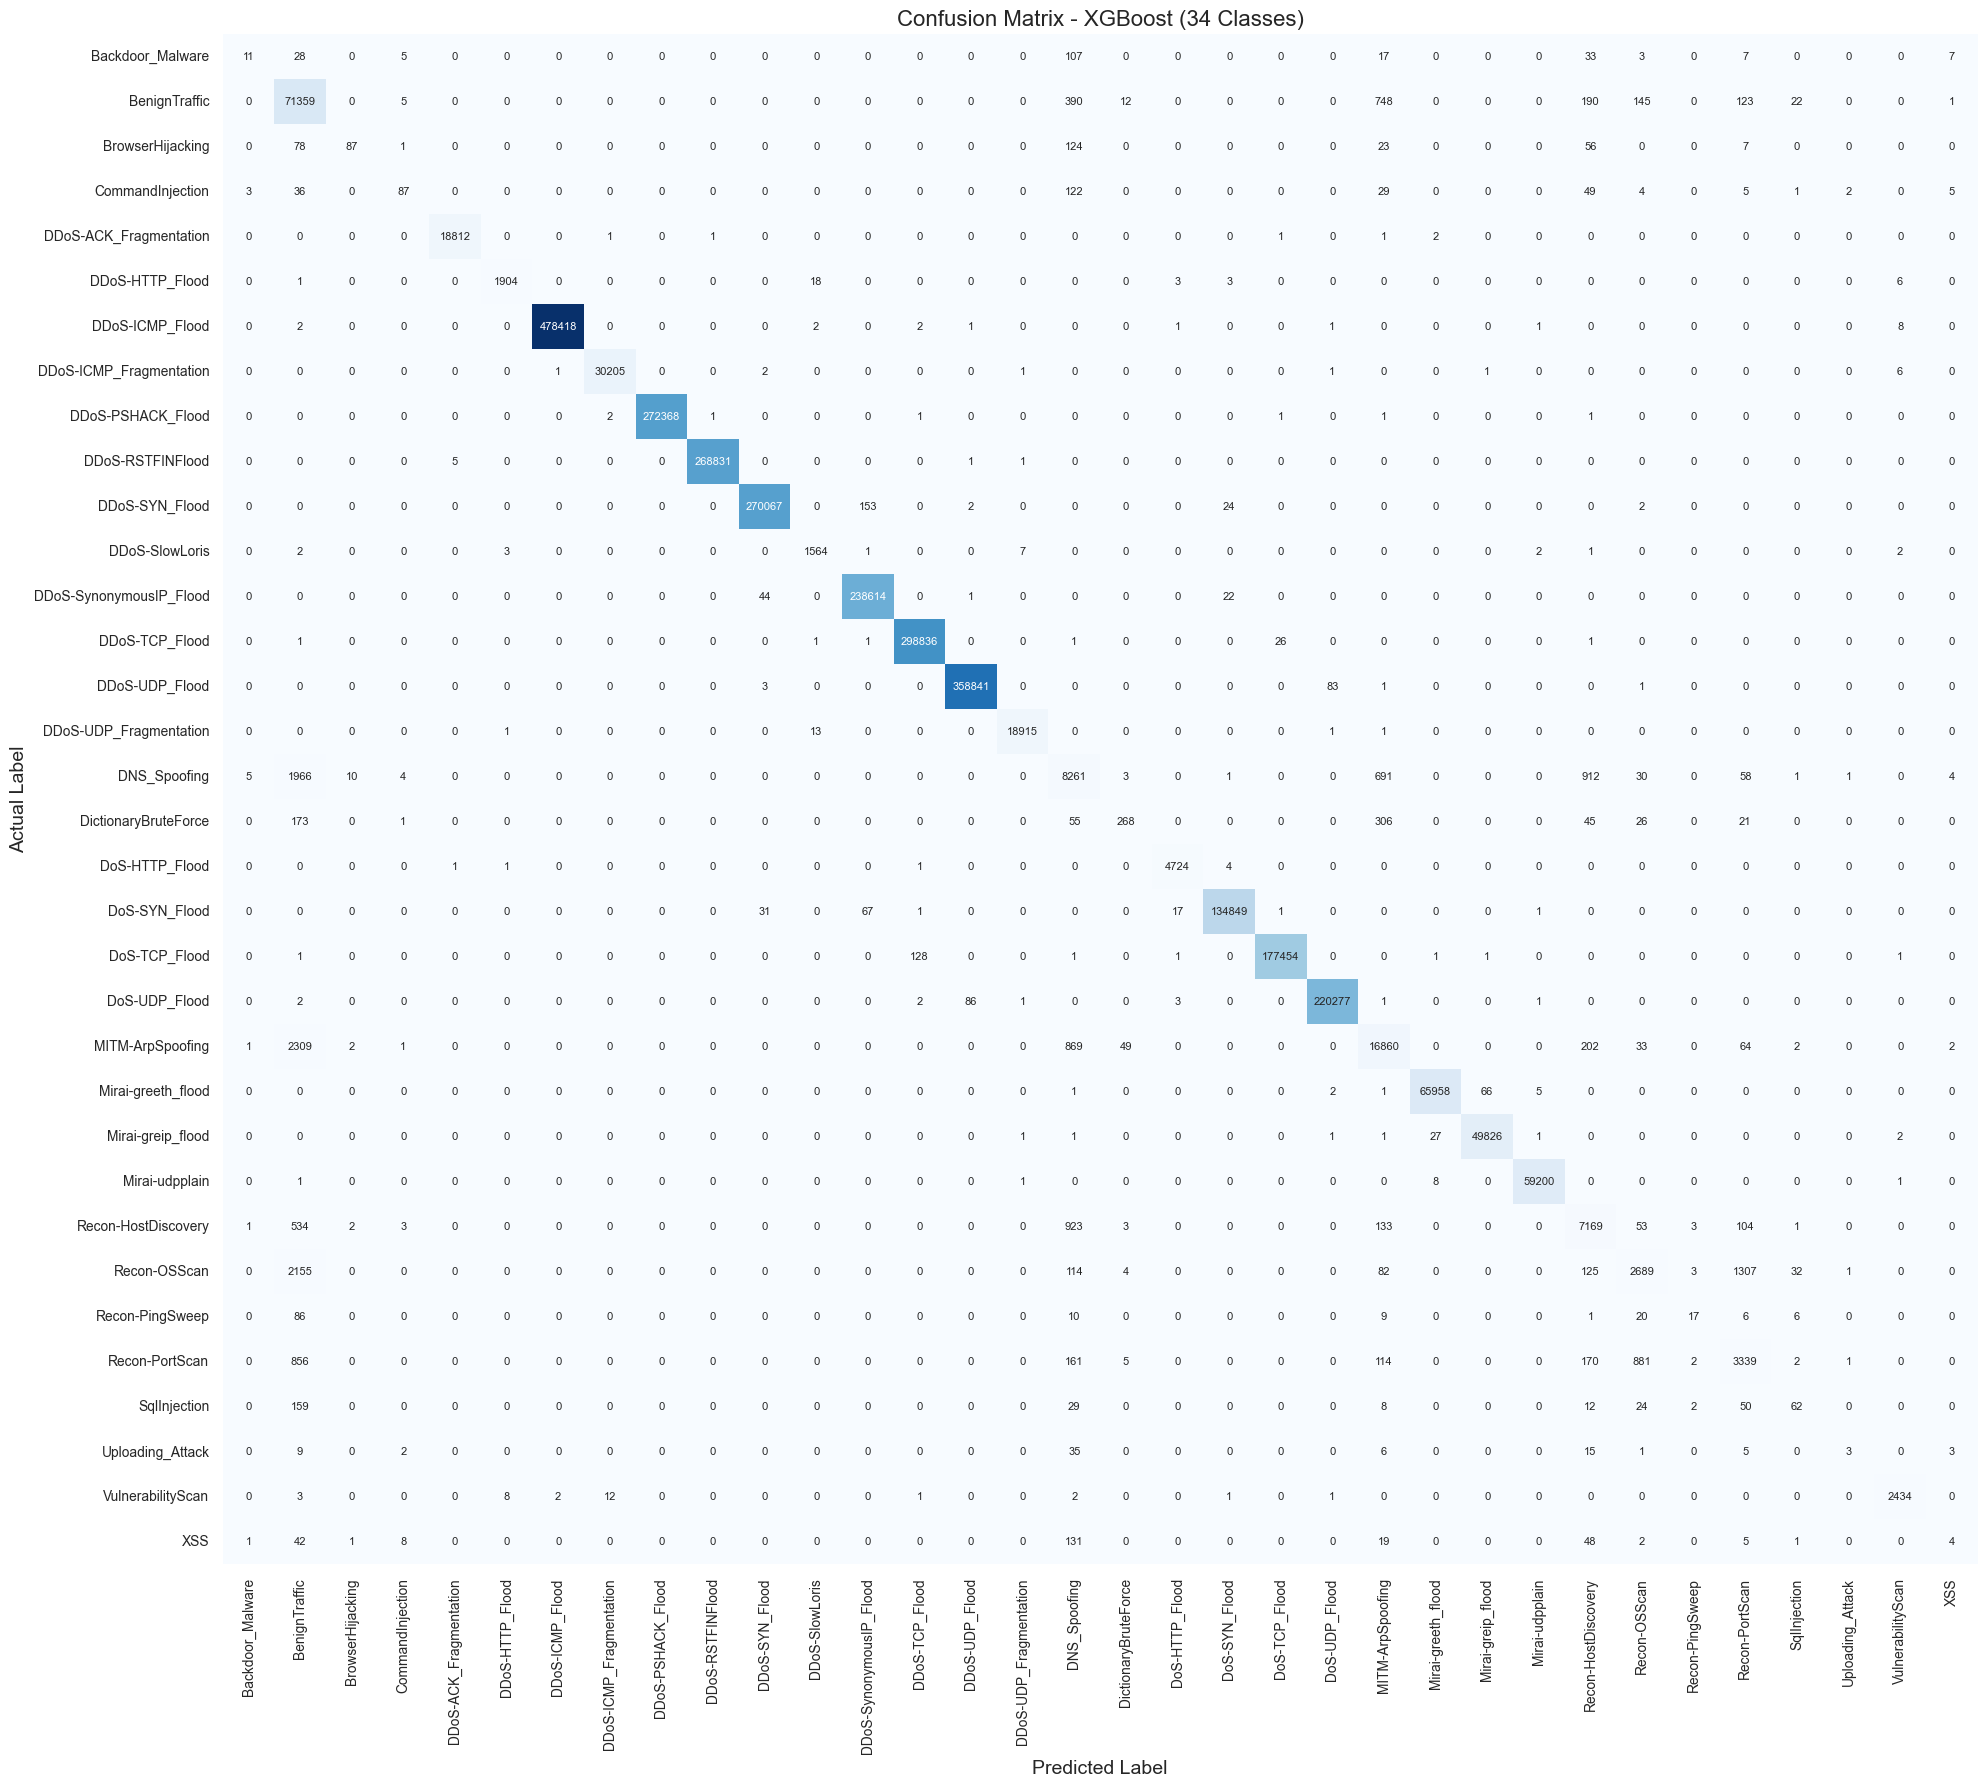

[시각화] 'cm_xgboost_34.png' 저장 완료

========== LightGBM (34-Class) ==========
훈련 시작...
예측 수행 중...
정확도: 0.6038


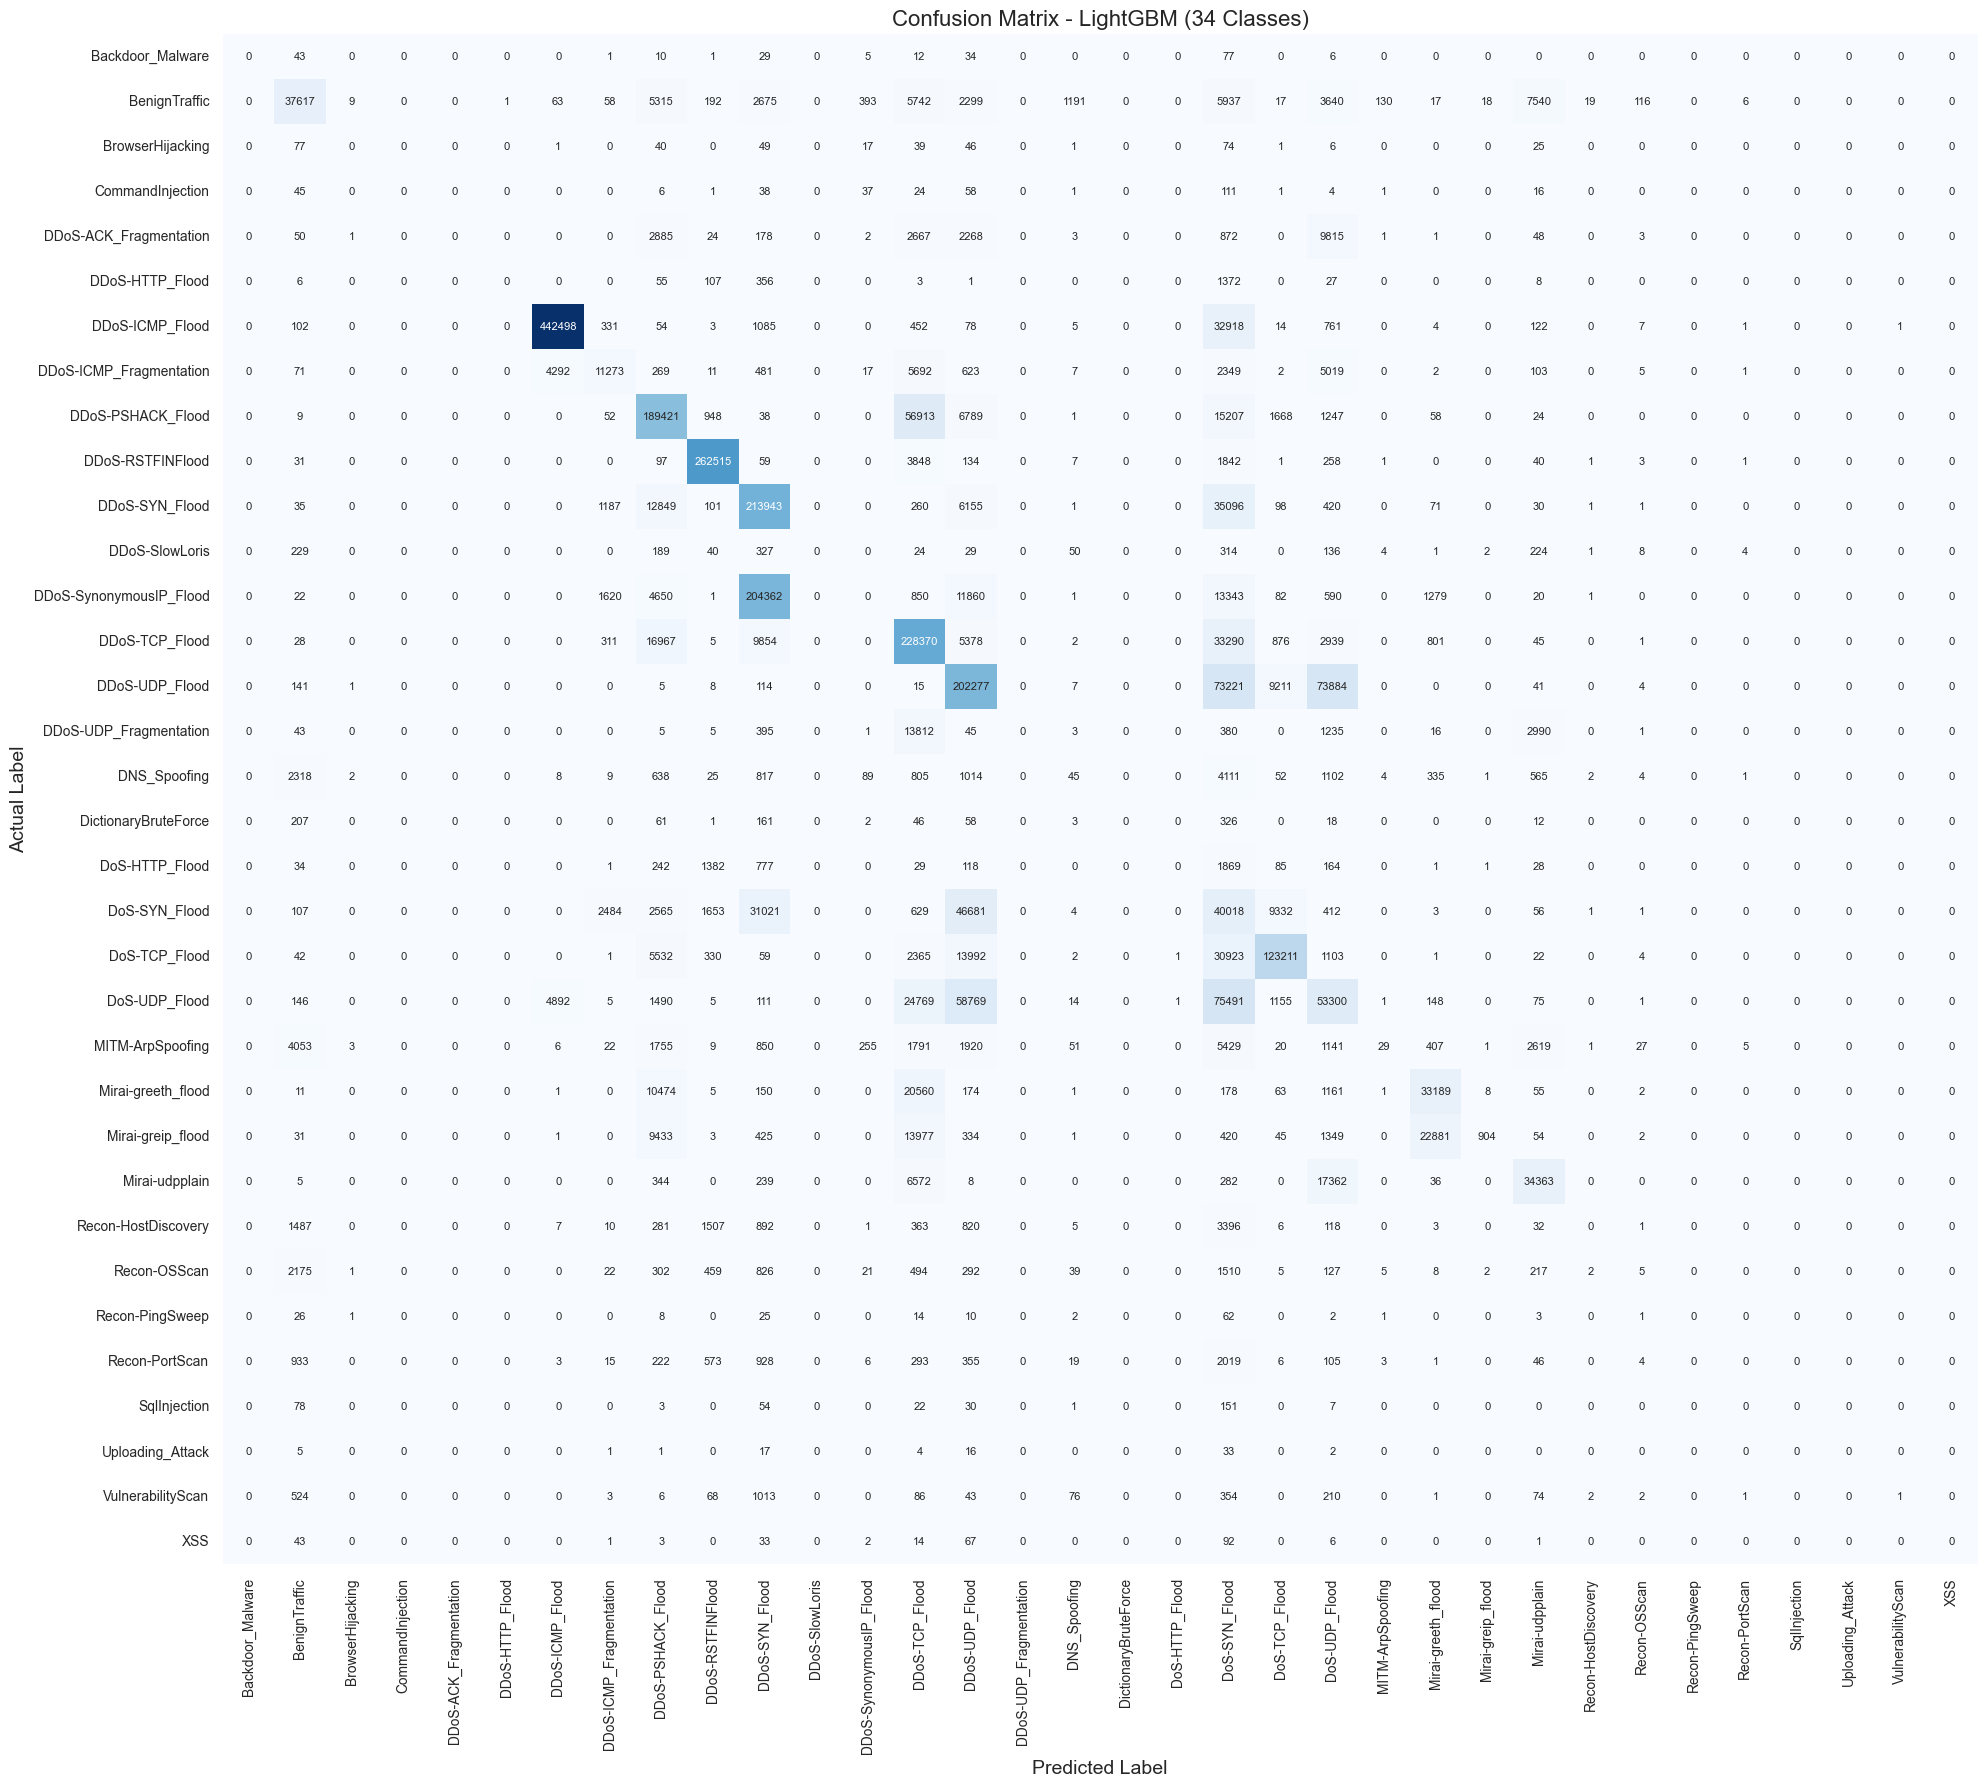

[시각화] 'cm_lightgbm_34.png' 저장 완료

모든 작업이 완료되었습니다.


In [18]:



# --- 5. 시각화 함수 정의 ---
def plot_large_confusion_matrix(y_true, y_pred, labels, model_name, filename):
    try:
        cm = confusion_matrix(y_true, y_pred, labels=labels)
        plt.figure(figsize=(20, 18)) # 34개 클래스를 위해 크기 키움
        sns.set(font_scale=0.9)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=labels, yticklabels=labels,
                    cbar=False, annot_kws={"size": 8})

        plt.title(f'Confusion Matrix - {model_name} (34 Classes)', fontsize=16)
        plt.ylabel('Actual Label', fontsize=14)
        plt.xlabel('Predicted Label', fontsize=14)
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.savefig(filename)
        plt.show()
        print(f"[시각화] '{filename}' 저장 완료")
    except Exception as e:
        print(f"시각화 오류: {e}")


# --- 6. XGBoost 34-Class 학습 및 평가 ---
print("\n========== XGBoost (34-Class) ==========")
print("훈련 시작 (시간이 소요될 수 있습니다)...")
xgb_model = XGBClassifier(n_estimators=100, n_jobs=-1, random_state=42, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_34_enc)

print("예측 수행 중...")
y_pred_xgb_enc = xgb_model.predict(X_test)
y_pred_xgb = le_34.inverse_transform(y_pred_xgb_enc) # 숫자 -> 문자열 복원

print(f"정확도: {accuracy_score(y_test_34, y_pred_xgb):.4f}")
plot_large_confusion_matrix(y_test_34, y_pred_xgb, le_34.classes_,
                            "XGBoost", "result_images/cm_xgboost_34.png")


# --- 7. LightGBM 34-Class 학습 및 평가 ---
print("\n========== LightGBM (34-Class) ==========")
print("훈련 시작...")
lgbm_model = LGBMClassifier(n_estimators=100, n_jobs=-1, random_state=42, verbose=-1)
lgbm_model.fit(X_train, y_train_34_enc)

print("예측 수행 중...")
y_pred_lgbm_enc = lgbm_model.predict(X_test)
y_pred_lgbm = le_34.inverse_transform(y_pred_lgbm_enc) # 숫자 -> 문자열 복원

print(f"정확도: {accuracy_score(y_test_34, y_pred_lgbm):.4f}")
plot_large_confusion_matrix(y_test_34, y_pred_lgbm, le_34.classes_,
                            "LightGBM", "cm_lightgbm_34.png")

print("\n모든 작업이 완료되었습니다.")